<a href="https://colab.research.google.com/github/sankyyy28/linear_Regression_model/blob/main/lr_and_gbr_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'openintro-possum' dataset.
Path to dataset files: /kaggle/input/openintro-possum


In [ ]:
#upload the data
df = pd.read_csv(f"{path}/possum.csv")
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


 EDA Operations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


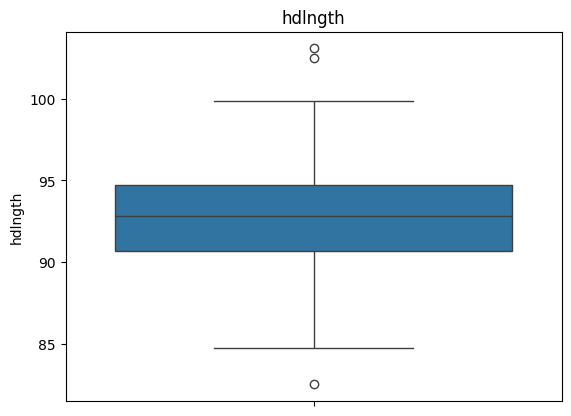

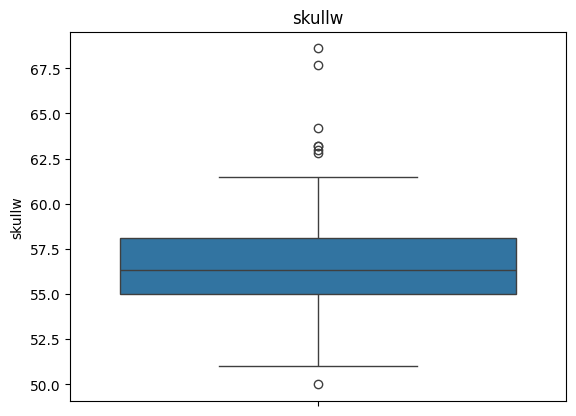

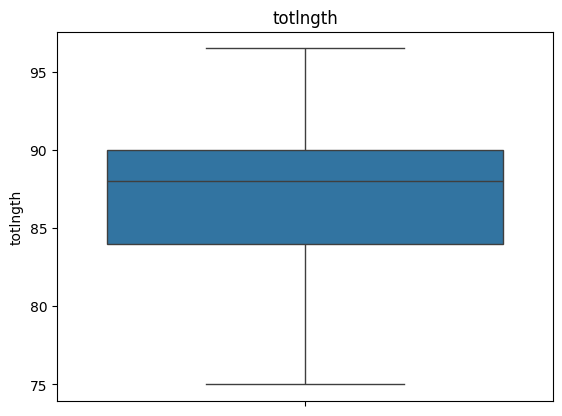

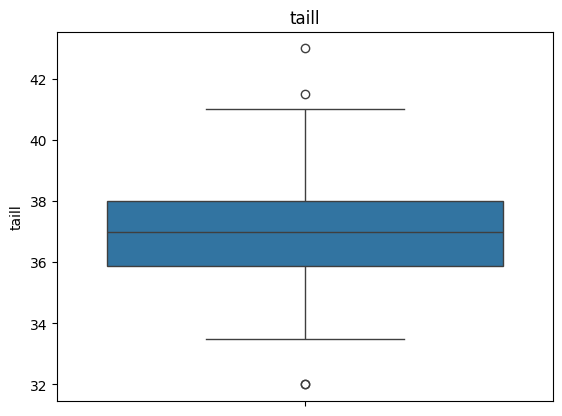

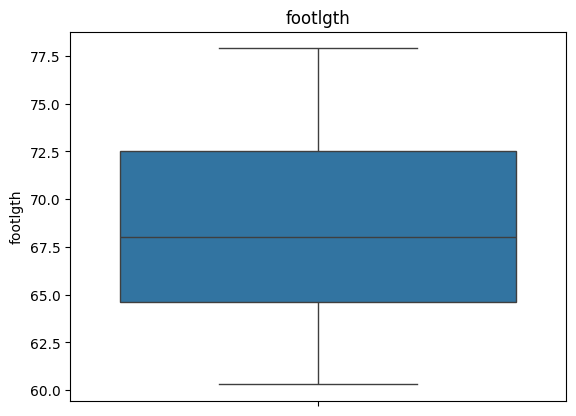

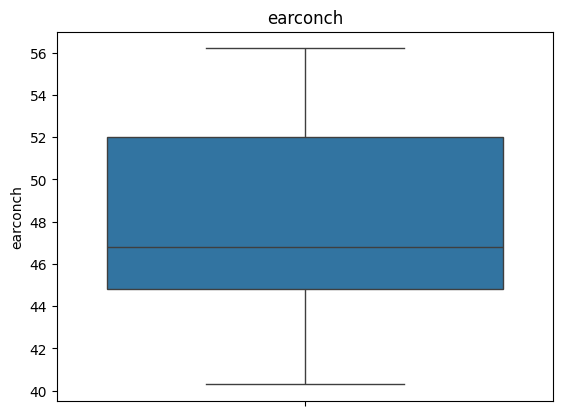

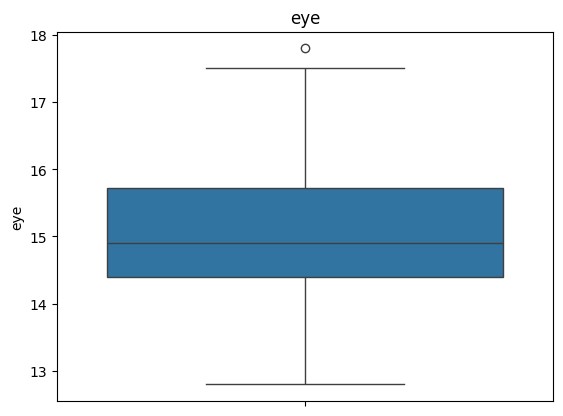

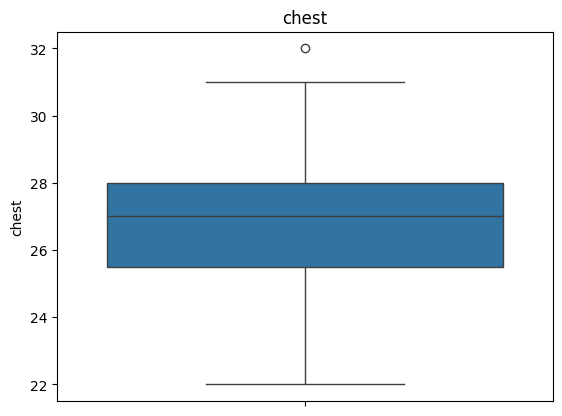

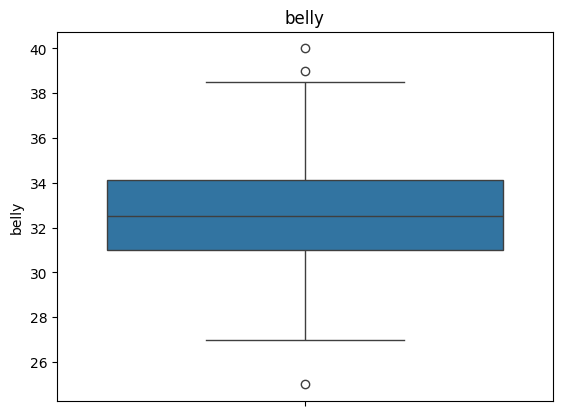

In [ ]:
for i in df.columns[5:]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
# remove outlier

clean_data = df.columns[5:]
for col in clean_data:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

display(df)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


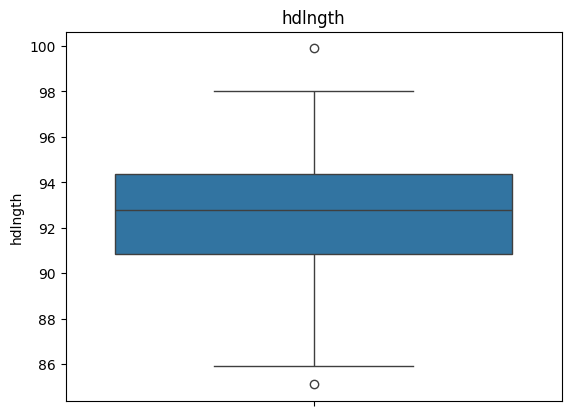

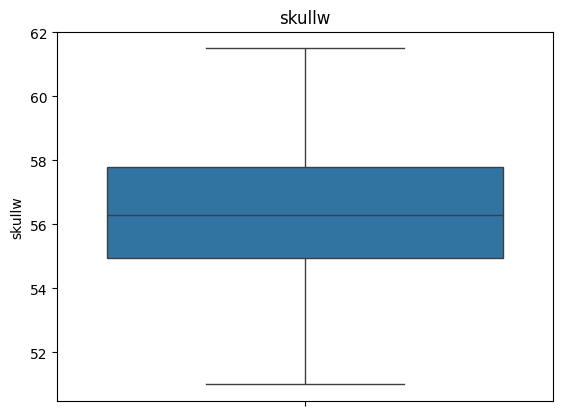

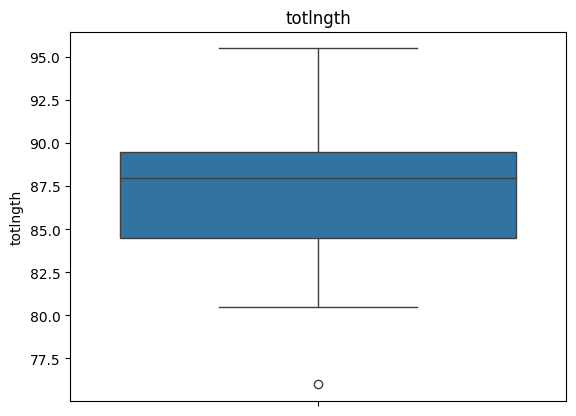

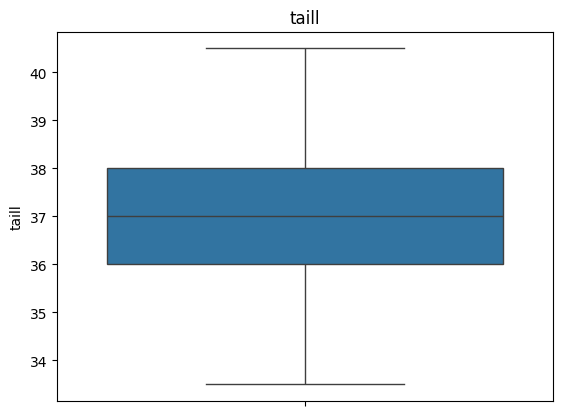

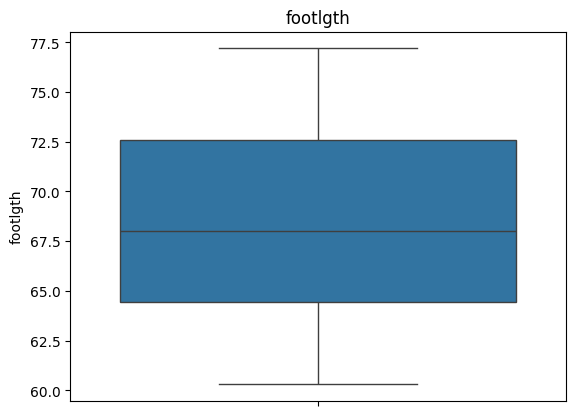

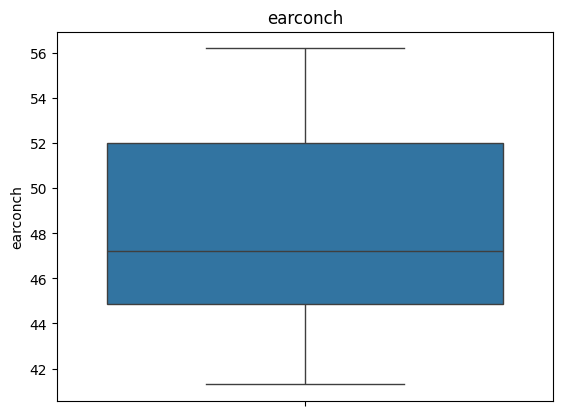

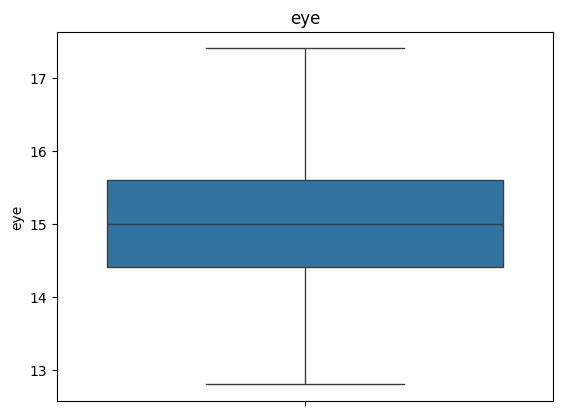

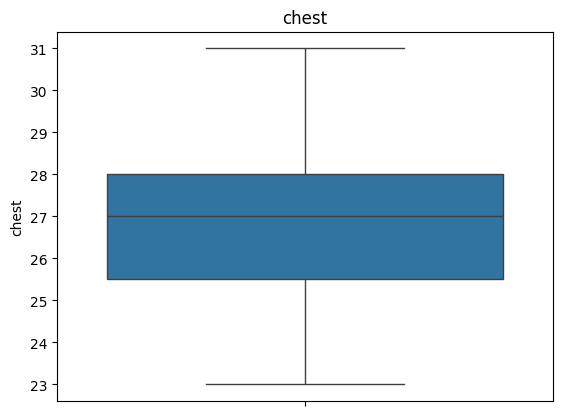

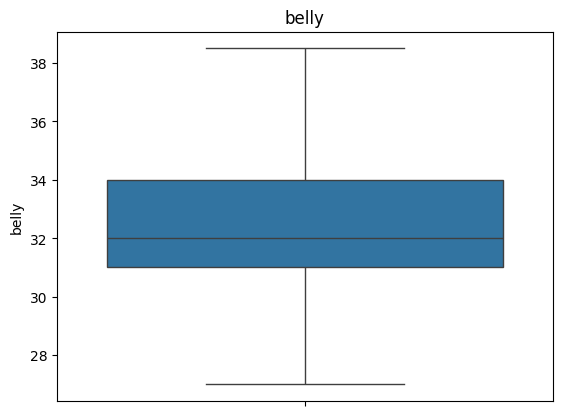

In [ ]:
for i in df.columns[5:]:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

<Axes: >

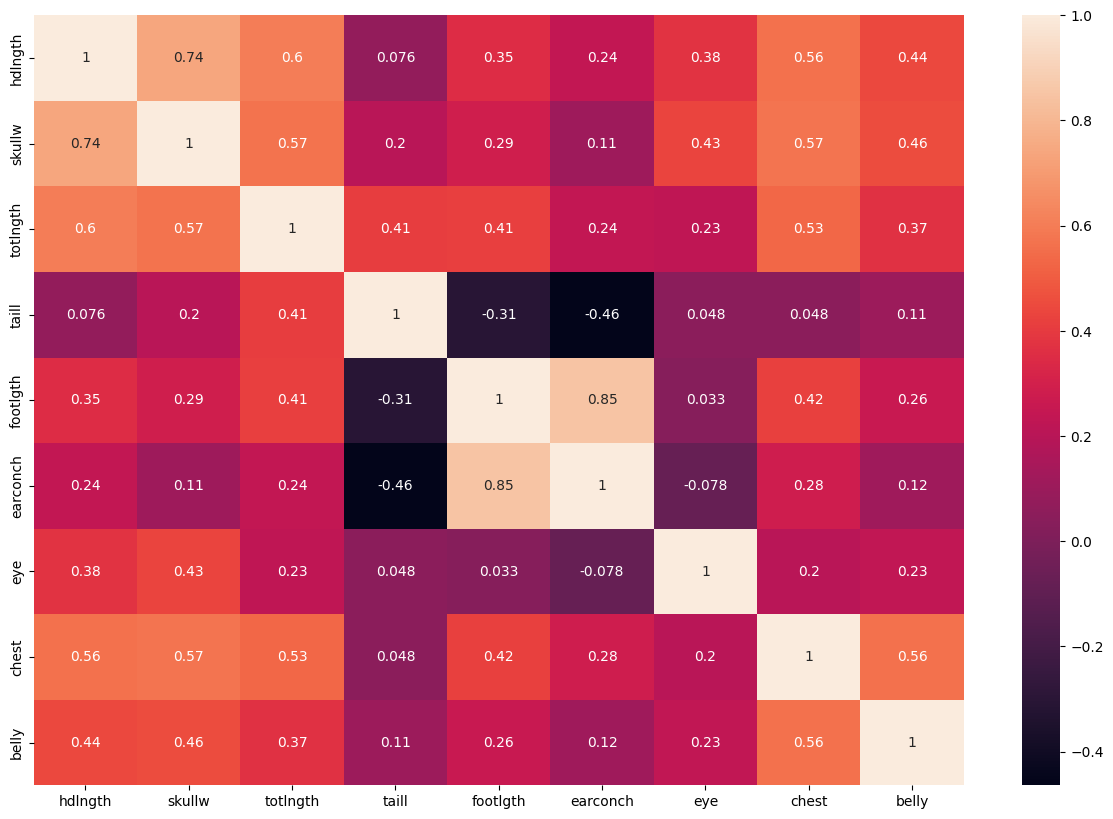

In [ ]:
# correlation
plt.figure(figsize=(15,10))
sns.heatmap(df[clean_data].corr(),annot = True)

In [ ]:
df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [ ]:
#ENCODING
df['Pop']=df['Pop'].map({'Vic':1, 'other':0})
df['sex']=df['sex'].map({'m':1, 'f':0})
df.dropna(inplace = True)


Features X and Y

In [ ]:
x = df.drop(["sex", "age"],axis=1)
y = df["sex"]

Train Test Split Operation

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Trainnig The Model and Evaluating

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred1 = gbr.predict(x_test)


In [ ]:
gbr_r2 = r2_score(y_test,y_pred1)
print(f" Testing result : {gbr_r2}")

 Testing result : -0.06293526042943465


In [ ]:
gbr_mse = mean_squared_error(y_test,y_pred1)
print(f" Testing result : {gbr_mse}")

 Testing result : 0.25261115757119273


In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:

y_pred2 = lr.predict(x_test)

In [ ]:
lr_r2 = r2_score(y_test,y_pred2)
print(f" Testing result : {lr_r2}")


 Testing result : -0.050050753375550094


In [ ]:
lr_mse = mean_squared_error(y_test,y_pred2)
print(f" Testing result : {lr_mse}")


 Testing result : 0.24954909879604115


In [ ]:
if (lr_r2 > gbr_r2) and (lr_mse < gbr_mse):
    print("Overall: Linear Regression performs better.")
elif (gbr_r2 > lr_r2) and (gbr_mse < lr_mse):
    print("Overall: Gradient Boosting performs better.")
else:
    print("Performance is mixed. Check both metrics carefully.")


Overall: Linear Regression performs better.


Creating Pickle File

In [ ]:
import pickle

with open("model_lr.pkl","wb") as f:
  pickle.dump(lr,f)


In [ ]:
import pickle

with open("scaler_lr.pkl","wb") as f:
  pickle.dump(lr,f)